# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.6'

In [20]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

NameError: name 'notebook' is not defined

## Import data and plot all benchmark results

In [ ]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.6_metrics.csv", index_col=0)
display(hpo_table.)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.0001,64,2,1,32,96,0.101197,0.239535,13,5,0.0,716.65
1,0.0001,64,2,1,32,336,0.098133,0.236292,14,9,0.0,1895.16
2,0.0001,64,2,1,64,96,0.086812,0.217883,16,8,0.2,1352.37
3,0.0001,64,2,1,64,336,0.083400,0.212539,16,15,0.2,3753.17
4,0.0001,64,2,1,128,96,0.074796,0.202208,9,4,0.7,1510.56
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0050,64,6,6,128,336,0.067125,0.190648,4,18,2.8,17991.39
116,0.0050,64,6,6,256,96,0.065726,0.189951,4,12,11.1,9436.43
117,0.0050,64,6,6,256,336,0.067421,0.191019,4,23,11.1,21337.84
118,0.0050,64,6,6,512,96,0.067395,0.191038,4,19,44.2,13933.20


In [ ]:
hpo_table.sum(axis=0)

learning_rate         0.198000
batch_size         7680.000000
e_layers            440.000000
d_layers            400.000000
d_model           23808.000000
seq_len           25920.000000
MSE                   9.001479
MAE                  24.324956
Epochs              748.000000
Time[min]          1546.000000
Params[Mio.]        820.000000
Max_mem[MB]      926129.080000
dtype: float64

In [ ]:
hpo_table.groupby("Params[Mio.]").mean()

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Max_mem[MB]
Params[Mio.],,,,,,,,,,,
0.0,0.00165,64.0,2.0,1.0,32.0,216.0,0.090945,0.225740,7.6250,3.7500,1305.9050
0.1,0.00165,64.0,3.0,3.0,32.0,216.0,0.078103,0.207688,8.0000,8.1250,2991.5400
0.2,0.00165,64.0,4.0,3.5,48.0,216.0,0.079810,0.209136,7.9375,10.0625,4158.8750
0.4,0.00165,64.0,3.0,3.0,64.0,216.0,0.071658,0.198918,6.6250,10.2500,5896.6000
0.7,0.00165,64.0,4.0,3.5,96.0,216.0,0.074414,0.202318,6.2500,11.7500,7089.9525
1.4,0.00165,64.0,3.0,3.0,128.0,216.0,0.069554,0.194900,5.7500,9.7500,6499.1450
2.6,0.00165,64.0,2.0,1.0,256.0,216.0,0.071743,0.197699,6.2500,5.7500,3374.9600
2.8,0.00165,64.0,6.0,6.0,128.0,216.0,0.069022,0.194584,5.8750,19.8750,12666.1150
5.5,0.00165,64.0,3.0,3.0,256.0,216.0,0.071332,0.197497,5.5000,13.0000,7872.1750


In [ ]:
hpo_table[hpo_table["MSE"]<0.08].groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,,
64,0.001728,3.709677,3.419355,211.268817,222.451613,0.071475,0.197724,5.870968,13.333333,6.478495,8232.591398


In [ ]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
57,0.0005,64,6,6,256,336,0.056870,0.179203,7,41,11.1,21337.84
101,0.0050,64,3,3,32,336,0.061062,0.183494,5,6,0.1,4268.13
111,0.0050,64,6,6,32,336,0.062267,0.185749,5,12,0.2,8267.32
85,0.0010,64,6,6,128,336,0.063344,0.186068,5,22,2.8,17991.39
73,0.0010,64,3,3,64,336,0.063697,0.187176,6,12,0.4,8462.23
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0050,64,2,1,32,336,0.095225,0.229496,5,3,0.0,1895.16
10,0.0001,64,3,3,32,96,0.095241,0.231447,16,13,0.1,1714.95
1,0.0001,64,2,1,32,336,0.098133,0.236292,14,9,0.0,1895.16
0,0.0001,64,2,1,32,96,0.101197,0.239535,13,5,0.0,716.65


In [ ]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.056869801133871

## Learning rate vs MSE

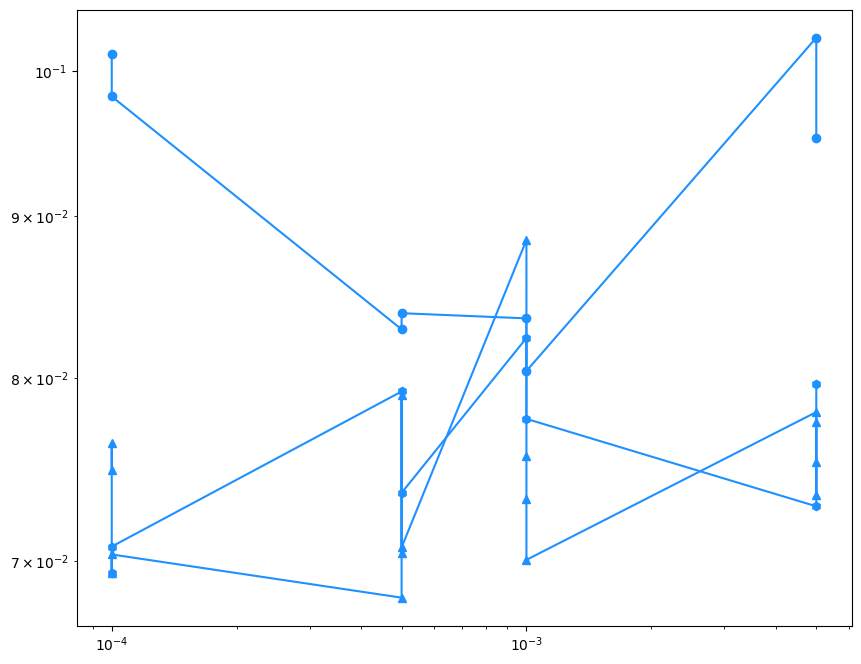

In [ ]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 1.6: 's', 10.5: 'h'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.6, 0.7, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

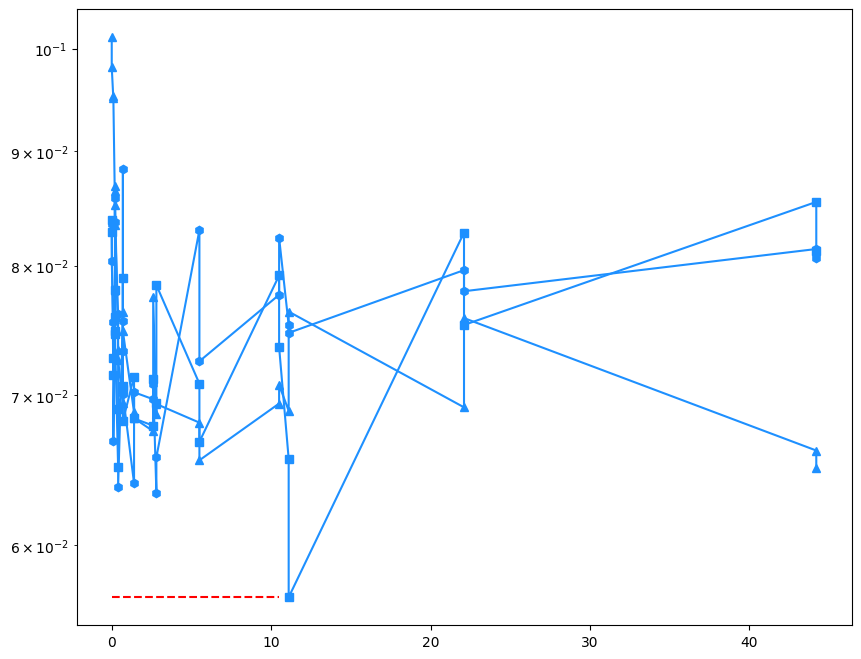

In [ ]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



In [ ]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
61,0.0010,64,2,1,32,336,0.080386,0.211801,5,3,0.0,1895.16
30,0.0005,64,2,1,32,96,0.082856,0.213905,9,4,0.0,716.65
60,0.0010,64,2,1,32,96,0.083518,0.217497,6,2,0.0,716.65
31,0.0005,64,2,1,32,336,0.083833,0.216671,5,3,0.0,1895.16
91,0.0050,64,2,1,32,336,0.095225,0.229496,5,3,0.0,1895.16
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.0050,64,6,6,512,336,0.070637,0.194466,4,37,44.2,28717.81
89,0.0010,64,6,6,512,336,0.080663,0.207854,4,37,44.2,28717.81
58,0.0005,64,6,6,512,96,0.081205,0.209914,4,19,44.2,13933.20
88,0.0010,64,6,6,512,96,0.081384,0.213124,4,19,44.2,13933.20


In [ ]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    if ynames is None:
        ynames = column_names
    else:
        ynames = ynames

    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    print(ys.shape)

    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter
    jitter_strength = 0.0001  # Adjust this value based on your data range
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, -1] = 0  # Don't jitter the last column

    zs += jitter


    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            #ax.set_yscale('log')


    axes[-1].set_yscale('log')

    #axes[-2].set_yscale('log')
    #axes[-3].set_yscale('log')

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)

    plt.tight_layout()
    plt.show()


(120, 6)


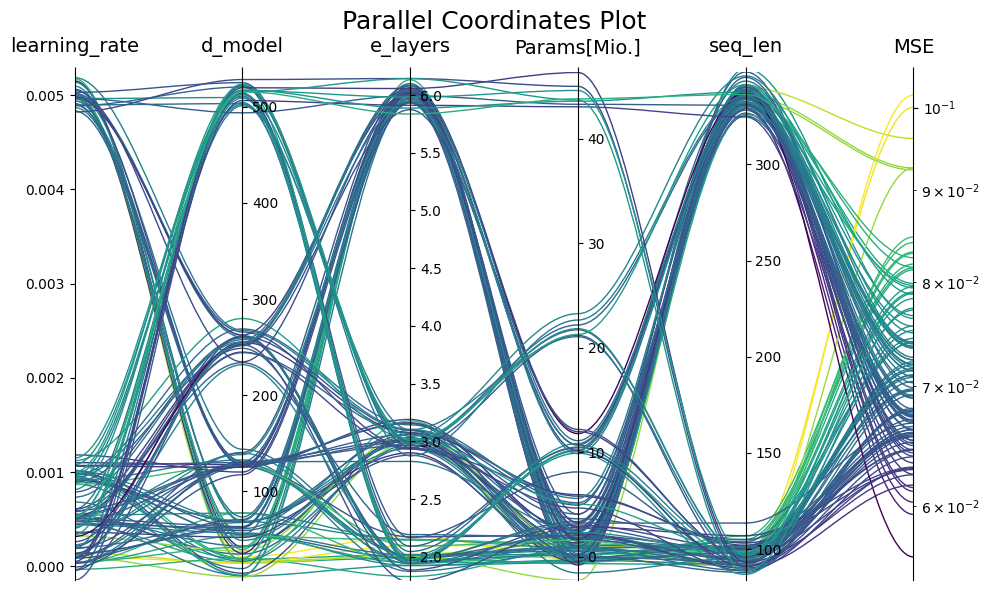

In [ ]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

(93, 6)


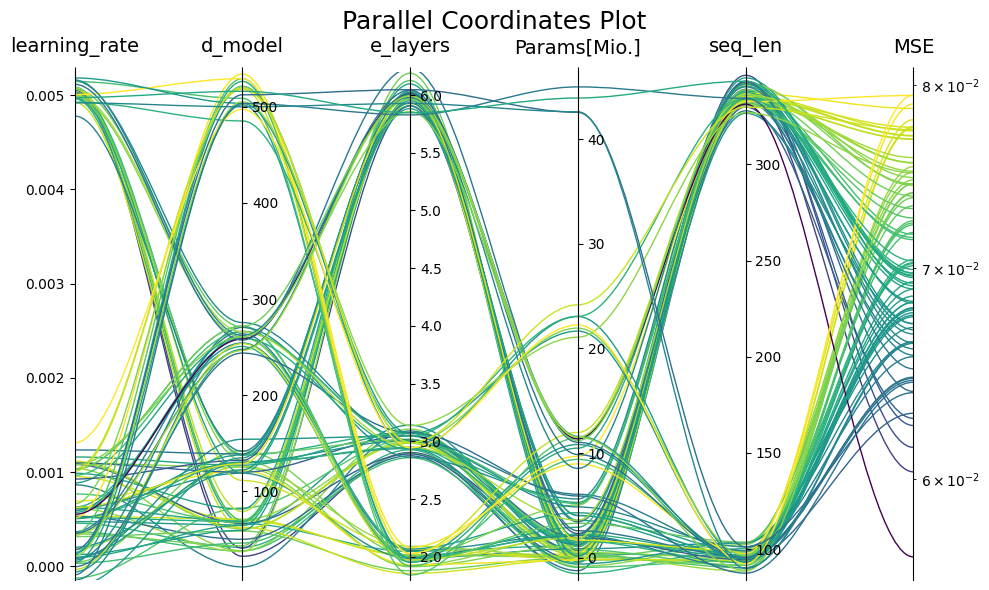

(21, 6)


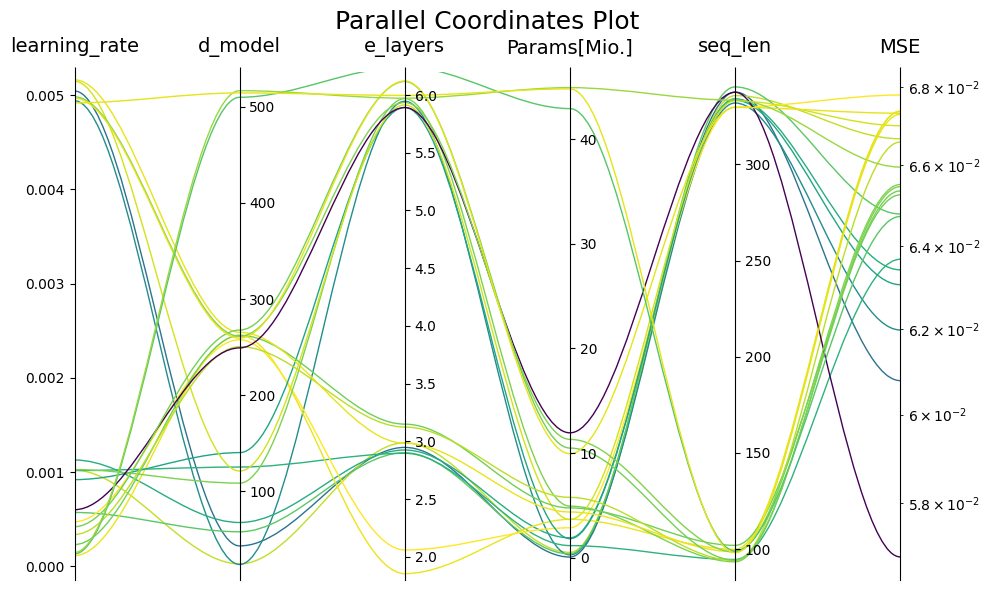

In [ ]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.068)

(8, 3)


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_39070/1850949566.py:35: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_39070/1850949566.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


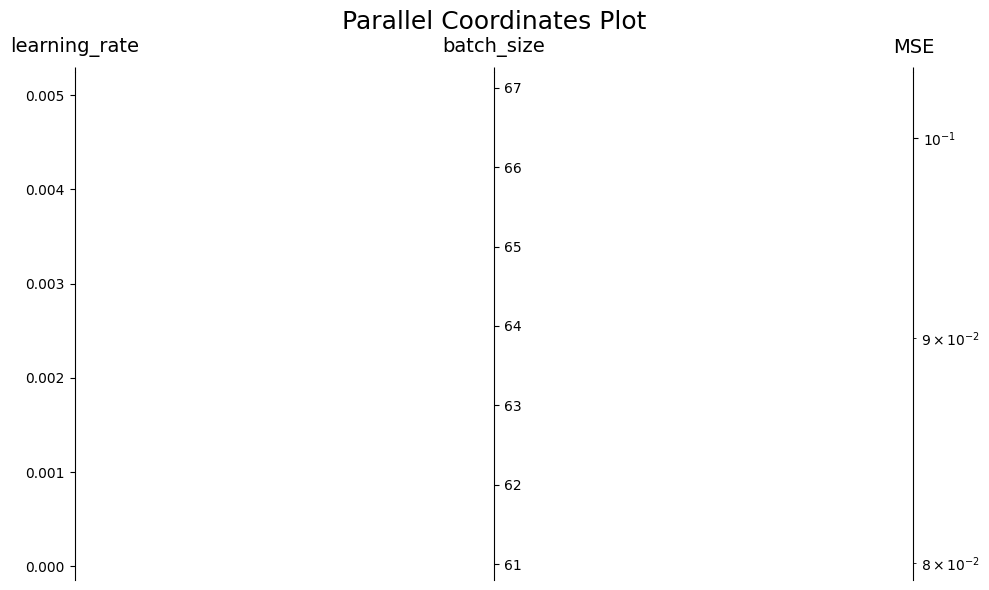

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


(16, 3)


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_39070/1850949566.py:35: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_39070/1850949566.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


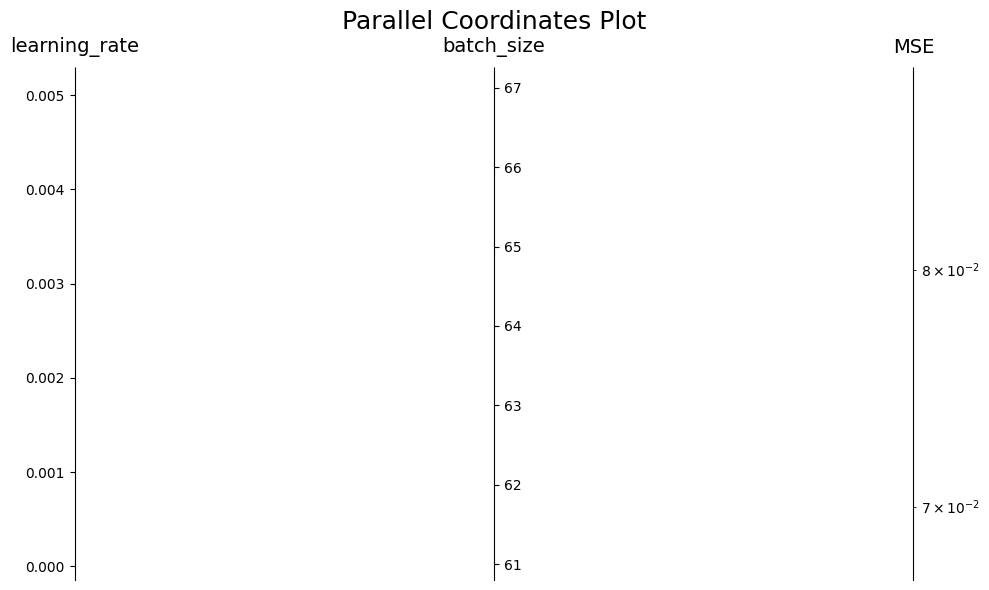

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

(0, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

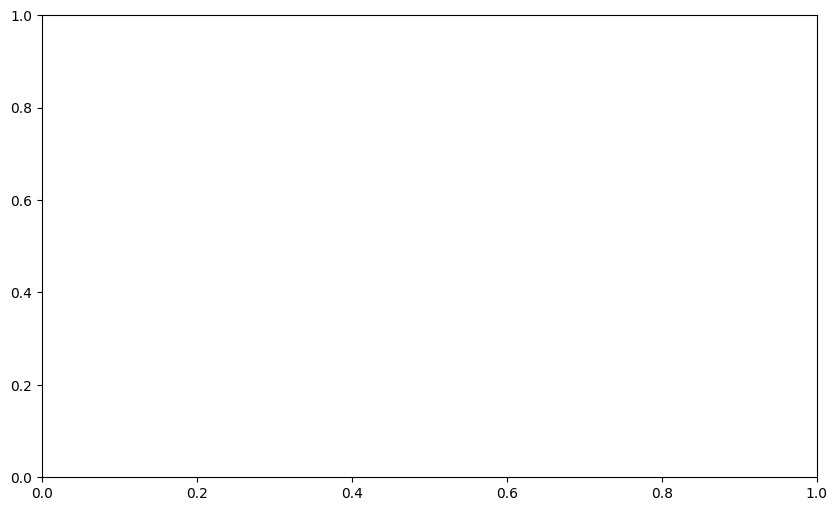

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


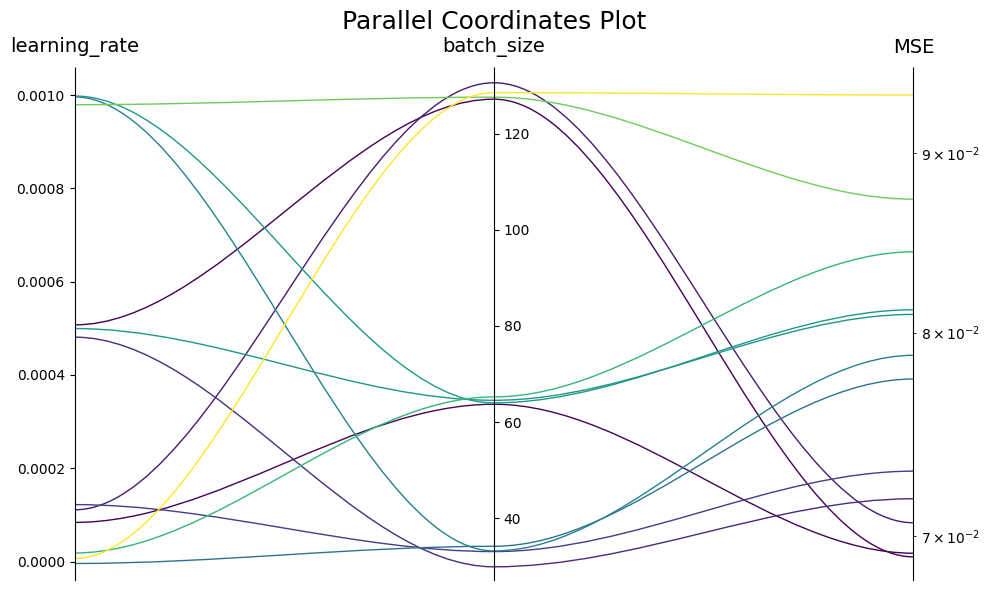

(7, 3)


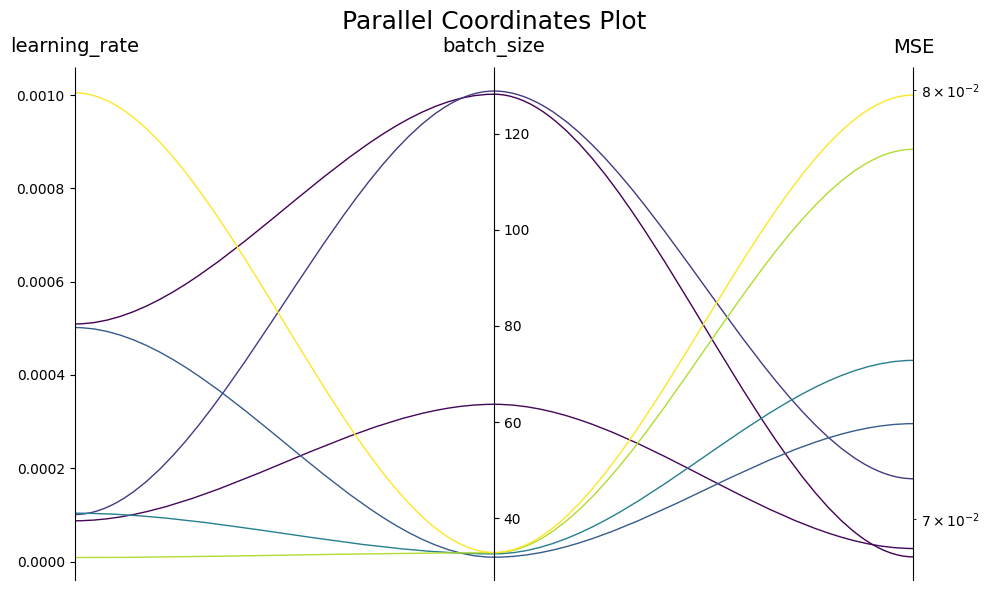

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)